In [2]:
!pip install nodepy

In [1]:
import nodepy
import matplotlib.pyplot as plt
import numpy as np

# Differenciálegyenletek numerikus megoldási módszerei

## Kezdeti érték probléma (Cauchy-feladat)

Egy kezdeti érték probléma (KÉP) általános alakja az alábbi. Keressük azt az $y\colon\mathbb{R}\to\mathbb{R}^n$ függvényt, amely teljesíti az alábi egyenletet:

$$
    \begin{array}{rcl}
        y'(t) &=& f(t, y(t)) \\
        y(0)  &=& y_0,
    \end{array}
$$

ahol $y_0\in\mathbb{R}^n$ és $f: \mathbb{R}\times\mathbb{R}^n\to \mathbb{R}^d$ függvény.

## Numerikus módszerek (nagy vonalakban)
Numeriksu módszerek esetében a valódi függvény egy *diszkretizált* változatát közelítjük, vagyis egy adott $\omega = {t_0 < t_1 < \dots < t_n}$ rácsháló pontjaiban közelítjük a keresett függvény valódi értékét:

$$
    y_i \approx y(t_i),
$$

ahol $y_i$ a közelítés és $y(t_i)$ a valódi függvényérték az $i$-edik rácspontban. Amennyiben bármely két szomszédos rácspont különbsége azonos ($h$), *ekvidisztáns* rácsról van szó.

Itt minden egyes közelítés az előző közelítés(ek)re épül, így sok kis hiba könnyen összeadódhat.

## A `nodepy` csomag

A `nodepy` csomag numerikus KDE megoldók gyűjteménye. Egy solver példányosítható az alábbi módon:

In [3]:
explicit_euler = nodepy.rk.loadRKM("FE") # FE mint forward Euler módszer

Egy diffegyenletet leíró függvény:

$$
    \dot{y}(t) = 5y(t)
$$

ekkor az $f$ függvény az alábbi:

$$
    (t,y(t))\mapsto 5y(t).
$$

Ennek python reprezentációja:

In [10]:
def f(t, y):
    λ = 5
    return λ * y * t

Szeretnénk megoldani a következő kezdetiérték problémát (_Initial value problem - IVP)_:
\begin{equation}
    \begin{array}{rcl}
        \dot{y}(t) & = & 5t\cdot y(t)\\
        y(0) & = & 1
    \end{array}
\end{equation}

Egy kezdeti érték probléma objektum az alábbi módon inicializálható:

In [19]:
my_ivp = nodepy.ivp.IVP(f = f,
                        u0 = 1,
                        t0 = 0,
                        T = 1)

Ezt már oda lehet adni a korábban példányosított solvernek:

In [20]:
t, y = explicit_euler(my_ivp, N = 100)

Kimenete:

```python
t,y
```
ahol `t` a rács, `y` a rácspontokban felvett közelítő érték.

In [28]:
import sympy as sy
from sympy.abc import X

F = sy.Function('F')

f = sy.dsolve(eq=sy.Derivative(F(X), X)-5*X*F(X),
          ics={F(0) : 1})

In [38]:
f = sy.lambdify(X, f.rhs, 'numpy')

In [24]:
def exact(t):
    return np.exp(0.5*5*t**2)

In [25]:
t = np.array(t)

C:\Users\Peter Dobrovoczki\anaconda3\envs\notebook\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


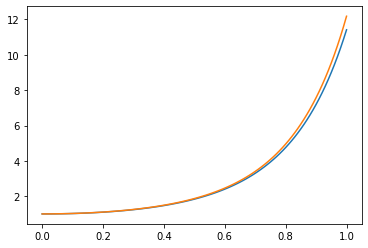

In [42]:
plt.plot(t, y, t, f(t))
plt.show()

C:\Users\Peter Dobrovoczki\anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


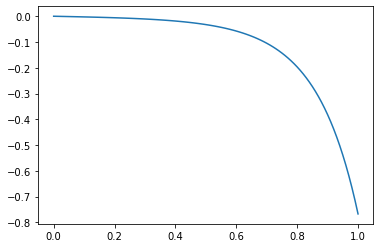

In [27]:
plt.plot(t, y-exact(t))

# Feladatok

A következő feladatokban használd a `numpy` csomagot és idézd fel, mit tanultál a *vektorizáció*ról előző félévben!

## Tesztfeladat:

Telepítsd a `nodepy` csomagot és importáld. Próbáld ki az alábbi tesztfeladaton:

$$
\left.
\begin{array}{rcl}
    \dot{y}(t) & = & r\cdot y(t)\cdot\left(1-\frac{y(t)}{K}\right)\\
    y(0) &=& 1
\end{array}
\right\}
$$

Legyen $K=83.4772$ és $r=0.977361$, az $f(t,y(t))$ függvény pedig

$$
    (t,y(t))\mapsto r\cdot y(t)\cdot\left(1-\frac{y(t)}{K}\right).
$$

Készítsd el a Cauchy-feladat példányt, az explicit Euler megoldó példányt és oldd meg a feladatot! Legyen $t_0=0, T=10, N=100$. Az eredményt vizualizáld is!

In [124]:
def f(t, y):
    #TODO

In [125]:
my_ivp = #TODO

## Implementáld az *Explicit Euler*-módszert!

A módszer:

$$
\begin{array}{rcl}
    y_{n+1} &= &y_n+h\cdot f(t_n, y_n)\\
    y_0 &=&y(t_0),
\end{array}
$$

ahol $h\in\mathbb{R}_+$ lépésköz, $t_n$ pedig $t_0+nh$.

A függvény bemenete legyen a Cauchy-feladatot leíró $f$ függvény, az $y_0$ kezdeti érték, $n$ a lépések száma és $T$, vagyis az időpont, ahol keressük a keresett függvény értékét. 

__Tipp: Ha először nem megy általános esetre, ahol $y\colon\mathbb{R}\to\mathbb{R}^n$, akkor először csak $n=1$ esetre implementáld!__

In [161]:
def EE(#TODO):
    # TODO

## Hasonlísd össze a megoldást, amit a `nodepy` solverrel kaptál a tesztfeladatra azzal, amit az általad implementált EE solver adott! Vizualizáld a különbséget!

## Próbáld ki a Lotka-Volterra egyenleteken:

A Lotka-Volterra egyenletek homogén ragadozó és préda populációk párhuzamos alakulását írja le, feltéve, hogy a két populáció egymással érintkezik. Az egyenletek az alábiak:

$$
\left.
\begin{array}{rcl}
    \dot{x}\left(t\right)&=&\alpha x\left(t\right) - \beta x\left(t\right)y\left(t\right)\\
    \dot{y}\left(t\right)&=&\delta x\left(t\right)y\left(t\right) - \gamma y\left(t\right)
\end{array}
\right\},
$$

ahol $x\left(t\right)$ a $t$ időpontban a prédák egyedszáma, $y\left(t\right)$ a ragadozók egyedszáma, $\alpha$ a prédák természetes reprodukciós rátája, $\beta$ a prédák ragadozók általi halálozási rátája, $\gamma$ a ragadozók halálozási rátája és $\delta$ a ragadozók növekedési rátája a prédák elejtése mellett.

Legyenek a paraméterek $\alpha = 1, \beta = 1.5, \gamma = 3, \delta = 1$.

__Oldd meg a `nodepy` solverrel és a saját solverrel is! A paraméterek:__
* $x(0)=5,\ y(0)=10$,
* $t0 = 0,\ T=10$,
* lépések száma: $N=10000$

In [77]:
def LotkaVolterra(t, y):
    # TODO

__Oldd meg a `nodepy` explicit Euler solverével és a saját implementációddal is! Vizualizáld a kapott eredményeket!__